# Example Calculation of the Load Differences Between a Pair of Scenarios


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import matplotlib.pyplot as plt


## Set the Directory Structure

In [6]:
# Identify the data input and image output directories:
data_input_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Production_Runs_V2/tell_data/outputs/tell_output/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2024_applied_energy/figures/'


## Process the Data


In [27]:
# Read in the state-level time series for 'rcp85hotter_ssp5':
df_one = pd.read_csv(data_input_dir + 'rcp85hotter_ssp5/2080/TELL_Balancing_Authority_Hourly_Load_Data_2080_Scaled_2080.csv')

# Rename a few columns for simplicity:
df_one.rename(columns={'Scaled_TELL_BA_Load_MWh': 'Load_One_MWh'}, inplace=True)

# Only keep the columns that are needed:
df_one = df_one[['BA_Code', 'Time_UTC', 'Load_One_MWh']].copy()

# Read in the state-level time series for 'rcp45hotter_ssp5':
df_two = pd.read_csv(data_input_dir + 'rcp85cooler_ssp5/2080/TELL_Balancing_Authority_Hourly_Load_Data_2080_Scaled_2080.csv')
            
# Rename a few columns for simplicity:
df_two.rename(columns={'Scaled_TELL_BA_Load_MWh': 'Load_Two_MWh'}, inplace=True)
       
# Only keep the columns that are needed:
df_two = df_two[['BA_Code', 'Time_UTC', 'Load_Two_MWh']].copy()
        
# Merge the two time series together on state name and time:
merged_df = df_one.merge(df_two, on=['BA_Code', 'Time_UTC'])
            
# Calculate the mean load between the two time-series as well as the absolute and relative load biases:
merged_df['Mean_Load_MWh'] =  merged_df[['Load_One_MWh', 'Load_Two_MWh']].mean(axis=1)
merged_df['Absolute_Difference_MWh'] = abs(merged_df['Load_One_MWh'] - merged_df['Load_Two_MWh'])
merged_df['Relative_Difference_%'] = 100*(merged_df['Absolute_Difference_MWh']/merged_df['Mean_Load_MWh']).round(4)

# Convert the time to a datetime variable:
merged_df['Time_UTC'] = pd.to_datetime(merged_df['Time_UTC'], format='%Y-%m-%d %H:%M:%S')

# Subset to just the data for CISO:
merged_df = merged_df[merged_df['BA_Code'] == 'CISO'].copy()

# Subset to the top 10% of all mean load hours:
peak_df = merged_df.nlargest(876,'Mean_Load_MWh')

# Compute the mean absolute and relative differences for the full dataset and peak subset:
merged_df['Mean_Abs_Diff_MWh'] = merged_df['Absolute_Difference_MWh'].mean().round(2)
merged_df['Mean_Rel_Diff_%'] = merged_df['Relative_Difference_%'].mean().round(2)
merged_df['Peak_Abs_Diff_M1_MWh'] = peak_df['Absolute_Difference_MWh'].mean().round(2)
merged_df['Peak_Rel_Diff_M1_%'] = peak_df['Relative_Difference_%'].mean().round(2)
#merged_df['Peak_Abs_Diff_M2_MWh'] = (abs(merged_df['Load_One_MWh'].max() - merged_df['Load_Two_MWh'].max())).round(2)
merged_df['Peak_Abs_Diff_M2_MWh'] = (abs(merged_df['Load_One_MWh'].max() - merged_df['Load_Two_MWh'].max()))
merged_df['Peak_Rel_Diff_M2_%'] = 100*(merged_df['Peak_Abs_Diff_M2_MWh'] / ((merged_df['Load_One_MWh'].max() + merged_df['Load_Two_MWh'].max())/2)).round(2)

merged_df


,BA_Code,Time_UTC,Load_One_MWh,Load_Two_MWh,Mean_Load_MWh,Absolute_Difference_MWh,Relative_Difference_%,Mean_Abs_Diff_MWh,Mean_Rel_Diff_%,Peak_Abs_Diff_M1_MWh,Peak_Rel_Diff_M1_%,Peak_Abs_Diff_M2_MWh,Peak_Rel_Diff_M2_%
61488,CISO,2080-01-01 00:00:00,46506.28,47232.99,46869.635,726.71,1.55,1601.08,2.51,3416.13,3.84,3238.42,3.0
61489,CISO,2080-01-01 01:00:00,49925.52,50374.44,50149.980,448.92,0.90,1601.08,2.51,3416.13,3.84,3238.42,3.0
61490,CISO,2080-01-01 02:00:00,52042.58,52887.47,52465.025,844.89,1.61,1601.08,2.51,3416.13,3.84,3238.42,3.0
61491,CISO,2080-01-01 03:00:00,54355.49,55496.78,54926.135,1141.29,2.08,1601.08,2.51,3416.13,3.84,3238.42,3.0
61492,CISO,2080-01-01 04:00:00,56758.06,57893.40,57325.730,1135.34,1.98,1601.08,2.51,3416.13,3.84,3238.42,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70267,CISO,2080-12-31 19:00:00,52163.51,52814.51,52489.010,651.00,1.24,1601.08,2.51,3416.13,3.84,3238.42,3.0
70268,CISO,2080-12-31 20:00:00,52473.64,53128.65,52801.145,655.01,1.24,1601.08,2.51,3416.13,3.84,3238.42,3.0
70269,CISO,2080-12-31 21:00:00,52935.59,53360.22,53147.905,424.63,0.80,1601.08,2.51,3416.13,3.84,3238.42,3.0
70270,CISO,2080-12-31 22:00:00,53915.82,53704.67,53810.245,211.15,0.39,1601.08,2.51,3416.13,3.84,3238.42,3.0


## Make the Plot


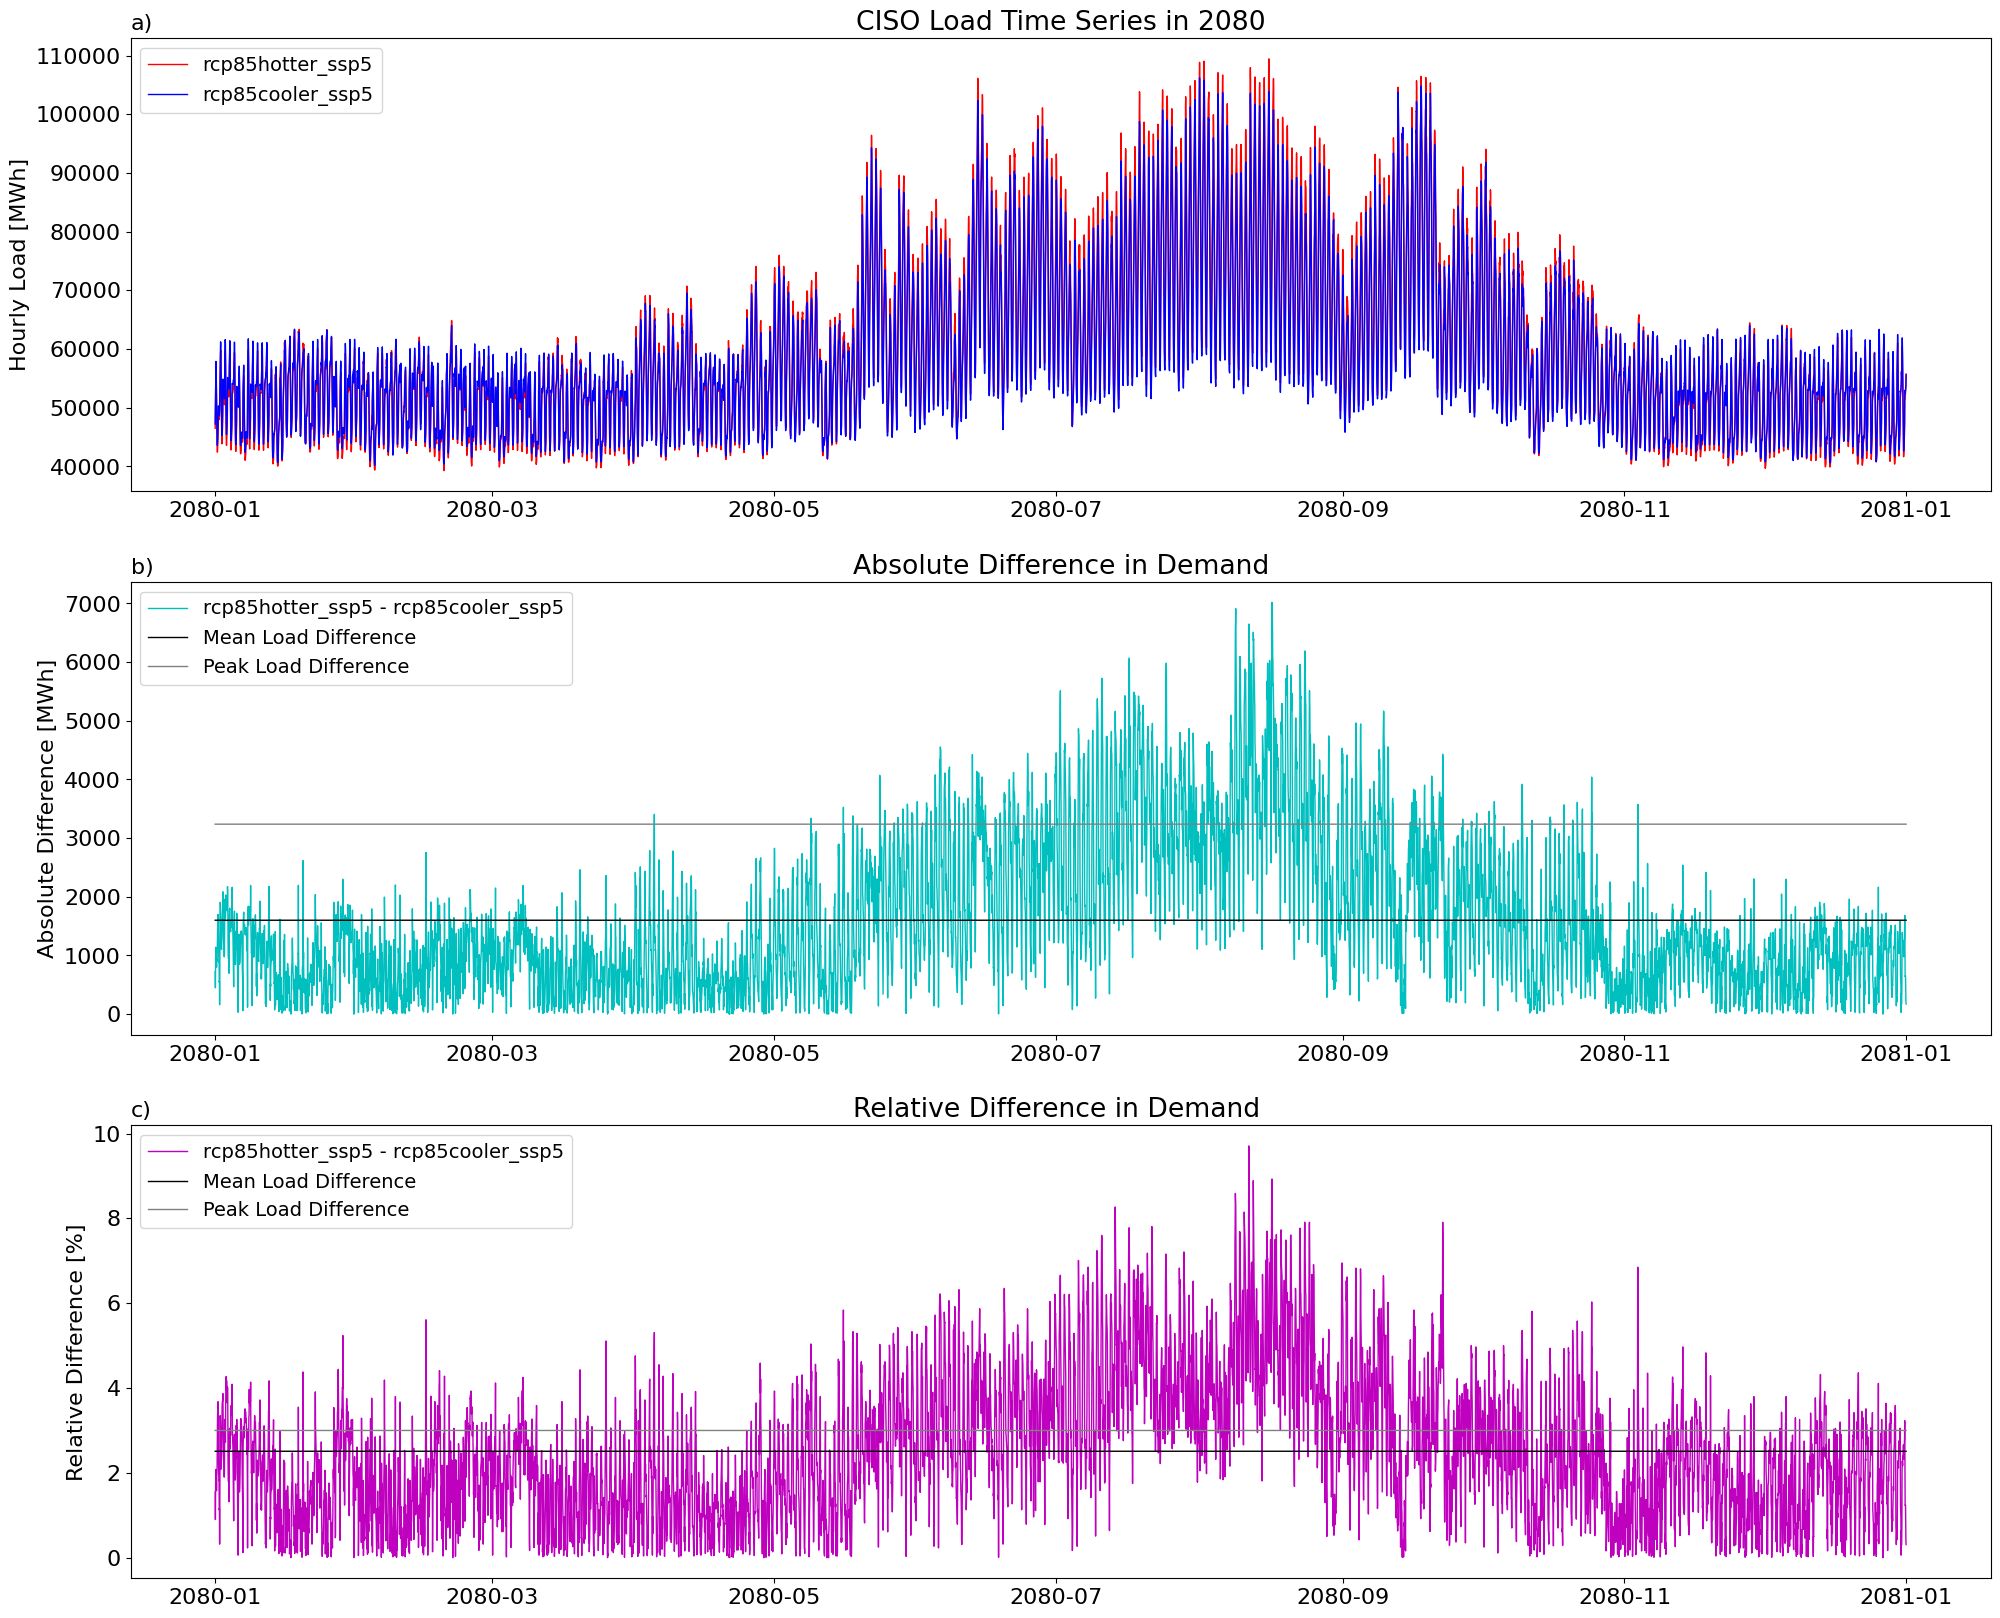

In [29]:
# Make the plot:
plt.figure(figsize=(24, 20))
plt.rcParams['font.size'] = 16
    
plt.subplot(311)
plt.plot(merged_df['Time_UTC'], merged_df['Load_One_MWh'], color='r', linestyle='-', label='rcp85hotter_ssp5', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Load_Two_MWh'], color='b', linestyle='-', label='rcp85cooler_ssp5', linewidth=1)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlabel('')
plt.ylabel('Hourly Load [MWh]')
plt.title('CISO Load Time Series in 2080')
plt.title('a)', loc='left', fontsize=16)

plt.subplot(312)
plt.plot(merged_df['Time_UTC'], merged_df['Absolute_Difference_MWh'], color='c', linestyle='-', label='rcp85hotter_ssp5 - rcp85cooler_ssp5', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Mean_Abs_Diff_MWh'], color='k', linestyle='-', label='Mean Load Difference', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Peak_Abs_Diff_M2_MWh'], color='gray', linestyle='-', label='Peak Load Difference', linewidth=1)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlabel('') 
plt.ylabel('Absolute Difference [MWh]')
plt.title('Absolute Difference in Demand')
plt.title('b)', loc='left', fontsize=16)

plt.subplot(313)
plt.plot(merged_df['Time_UTC'], merged_df['Relative_Difference_%'], color='m', linestyle='-', label='rcp85hotter_ssp5 - rcp85cooler_ssp5', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Mean_Rel_Diff_%'], color='k', linestyle='-', label='Mean Load Difference', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Peak_Rel_Diff_M2_%'], color='gray', linestyle='-', label='Peak Load Difference', linewidth=1)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlabel('') 
plt.ylabel('Relative Difference [%]')
plt.title('Relative Difference in Demand ')
plt.title('c)', loc='left', fontsize=16)

filename = ('Calculations.png')
plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')
